In [ ]:
# The goal of this script is to perform various tests related to the Parametrized Post-Friedmann (PPF) approximation
# of Hu & Sawicki [arXiv:0708.1190], further described in Fang, Hu & Lewis [arXiv:0808.3125]

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
# Select the output wavenumbers (in 1/Mpc) for the perturbations
k_out = [5e-5, 5e-4, 5e-3]

# Define a list of models and the corresponding parameters
models = ['PPF1','PPF2','FLD1','FLD1S']
# The w0/wa parameters of the CPL expansion of dark energy
w0 = {'PPF1':-0.7,'PPF2':-1.15,'FLD1':-0.7,'FLD1S':-0.7}
wa = {'PPF1':0.,'PPF2':0.5,'FLD1':0.,'FLD1S':0.}
# The omega_cdm, omega_b, and h standard LCDM parameters
omega_cdm = {'PPF1':0.104976,'PPF2':0.120376,'FLD1':0.104976,'FLD1S':0.104976}
omega_b = 0.022
##Omega_cdm = {'PPF1':0.26,'PPF2':0.21,'FLD1':0.26,'FLD1S':0.26}
##Omega_b = 0.05
h = {'PPF1':0.64,'PPF2':0.74,'FLD1':0.64,'FLD1S':0.64}



# Put all cosmology objects into a dictionary
cosmo = {}

for M in models:
    # Each one of these will use the PPF approximation of dark energy, and work in Newtonian gauge 
    # (except for the 'S' cases for synchronous gauge, and the 'FLD' case for fluid equations instead of PPF)
    use_ppf = 'yes'
    gauge = 'Newtonian'
    if 'FLD' in M:
        use_ppf = 'no'
    if 'S' in M:
        gauge = 'Synchronous'

    # We are putting a CLASS object into each part of the dictionary
    cosmo[M] = Class()

    # Now we actually set the corresponding parameters
    # Inputs: temperature Cls (tCl), matter power spectrum (mPk), density transfers (dTk), velocity transfers (vTk)
    cosmo[M].set({'output':'tCl mPk dTk vTk',
                  # The next line is to return perturbations directly
                  'k_output_values':str(k_out).strip('[]'),
                  'h':h[M],
                  'omega_b':omega_b,'omega_cdm':omega_cdm[M],
                  ##'Omega_b':Omega_b,'Omega_cdm':Omega_cdm[M],
                  'cs2_fld':1.,
                  'Omega_Lambda':0., # Since Lambda=0, we fill universe with fluid instead
                  'w0_fld':w0[M],'wa_fld':wa[M], # Thus, we can set fluid parameters
                  'gauge':gauge,
                  'use_ppf':use_ppf})

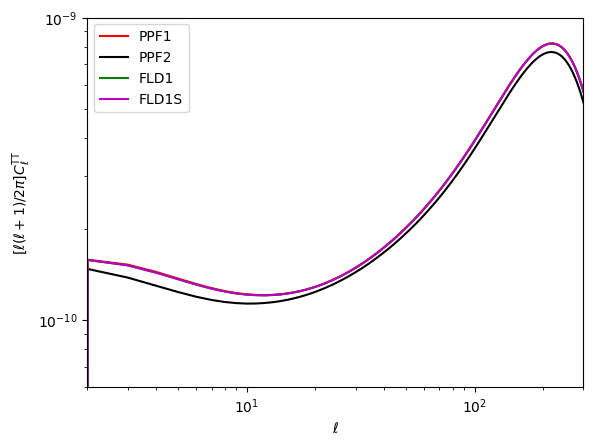

In [3]:
colors = ['r','k','g','m']
for i,M in enumerate(models):
    # For each model, get unlensed Cls
    cl = cosmo[M].raw_cl()
    # Then get the L multipoles
    l = cl['ell']
    # Plot L and DL = CL * (l*(l+1))/(2pi)
    plt.loglog(l,cl['tt']*l*(l+1)/(2.*np.pi),label=M,color=colors[i])

plt.legend(loc='upper left')
plt.xlim([2,300])
plt.ylim([6e-11,1e-9])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')

plt.savefig('check_PPF_clTT.pdf')

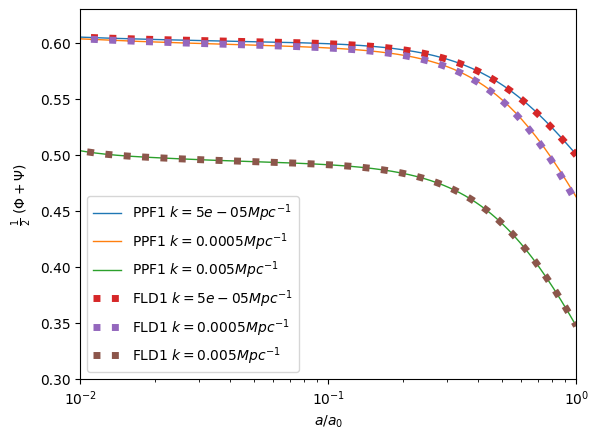

In [4]:
# For the models 1, we want additional plots
for M in ['PPF1','FLD1']:
    # These will return the perturbations at the k_output_values previously passed
    pt = cosmo[M].get_perturbations()
    # Take only scalar perturbations
    pts = pt['scalar']
    # And now for each k of the k_output_values we want to plot the lensing potential (phi+psi)/2
    for i,k in enumerate(k_out):
        ptk = pts[i]
        # Each time, take a diffrent line style
        if 'FLD' in M:
            ls = ':'
            lw=5
        else:
            ls = '-'
            lw=1
        # Now perform actual plot
        plt.semilogx(ptk['a'],0.5*(ptk['phi']+ptk['psi']),label=M+' '+'$k='+str(k)+'Mpc^{-1}$',ls=ls,lw=lw)
        
plt.legend(loc='lower left')
plt.xlim([1e-2,1])
plt.ylim([0.3,0.63])
plt.xlabel(r'$a/a_0$')
plt.ylabel(r'$\frac{1}{2} ~(\Phi+\Psi)$')

plt.savefig('check_PPF_metric.pdf')

458 456
450 457
481 477
476 477
500 494
516 509


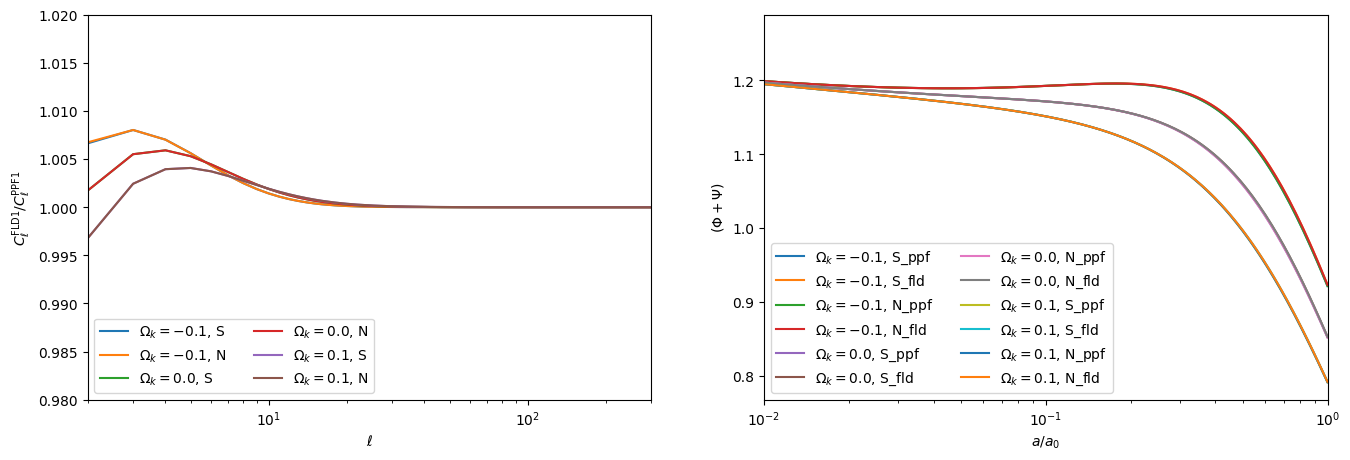

In [5]:
# If you are in a closed universe, you can use this approximation
#kminclosed = sqrt(-8*Omega_k)*(70/3e5) Mpc^(-1)

# Reduce to just a single output value for this specific plot
k_out = [1e-3] #[1e-4, 1e-3, 1e-2]
# Reduce to just two models for this specific plot
# (but we will vary the gauge manually, unlike before)
models = ['PPF1','FLD1']
#models = ['PPF1','PPF2','FLD1']

fig, axes = plt.subplots(1,2,figsize=(16,5))
# Let's try to do the same as above, but now with curvature
for Omega_K in [-0.1, 0.0, 0.1]:
    # Now vary the gauge manually
    for gauge in ['Synchronous','Newtonian']:
        cosmo = {}
        for M in models:
            # Check if you want to use PPF in this cas
            use_ppf = 'yes'
            if 'FLD' in M:
                use_ppf = 'no'

            # Set the specific CLASS model
            cosmo[M] = Class()
    
            cosmo[M].set({'output':'tCl mPk dTk vTk','k_output_values':str(k_out).strip('[]'),
                  'h':h[M],
                  'omega_b':omega_b,'omega_cdm':omega_cdm[M],'Omega_k':Omega_K,
                  ##'Omega_b':Omega_b,'omega_cdm':Omega_cdm[M],
                  'cs2_fld':1.,
                  'w0_fld':w0[M],'wa_fld':wa[M],'Omega_Lambda':0.,'gauge':gauge,
                 'use_ppf':use_ppf,'hyper_sampling_curved_low_nu':10.0})

        # Get the raw Cl's
        clfld = cosmo['FLD1'].raw_cl()
        clppf = cosmo['PPF1'].raw_cl()

        # Plot semi-logarithmically
        label = r'$\Omega_k='+str(Omega_K)+'$, '+gauge[0]
        axes[0].semilogx(clfld['ell'][2:],clppf['tt'][2:]/clfld['tt'][2:],label=label)

        # Also plot the scalar peturbations
        ptfld = cosmo['FLD1'].get_perturbations()['scalar']
        ptppf = cosmo['PPF1'].get_perturbations()['scalar']
        # For each of the k_output_values, plot phi+psi with PPF and without
        for i,k in enumerate(k_out):
            ptkfld = ptfld[i]
            a = ptkfld['a']
            phi_plus_phi_fld = ptkfld['phi']+ptkfld['psi']
            ptkppf = ptppf[i]
            phi_plus_phi_ppf = ptkppf['phi']+ptkppf['psi']
            axes[1].semilogx(ptkppf['a'],phi_plus_phi_ppf,label=label+'_ppf')
            axes[1].semilogx(ptkfld['a'],phi_plus_phi_fld,label=label+'_fld')
            print (len(ptkppf['a']),len(ptkfld['a']))
            
axes[0].legend(loc='lower left',ncol=2)
axes[0].set_xlim([2,300])
axes[0].set_ylim([0.98,1.02])
axes[0].set_xlabel(r'$\ell$')
axes[0].set_ylabel(r'$C_\ell^\mathrm{FLD1}/C_\ell^\mathrm{PPF1}$')

axes[1].legend(loc='lower left',ncol=2)
axes[1].set_xlim([1e-2,1])
axes[1].set_xlabel(r'$a/a_0$')
axes[1].set_ylabel(r'$(\Phi+\Psi)$')

fig.savefig('check_PPF_Omegak.pdf')        

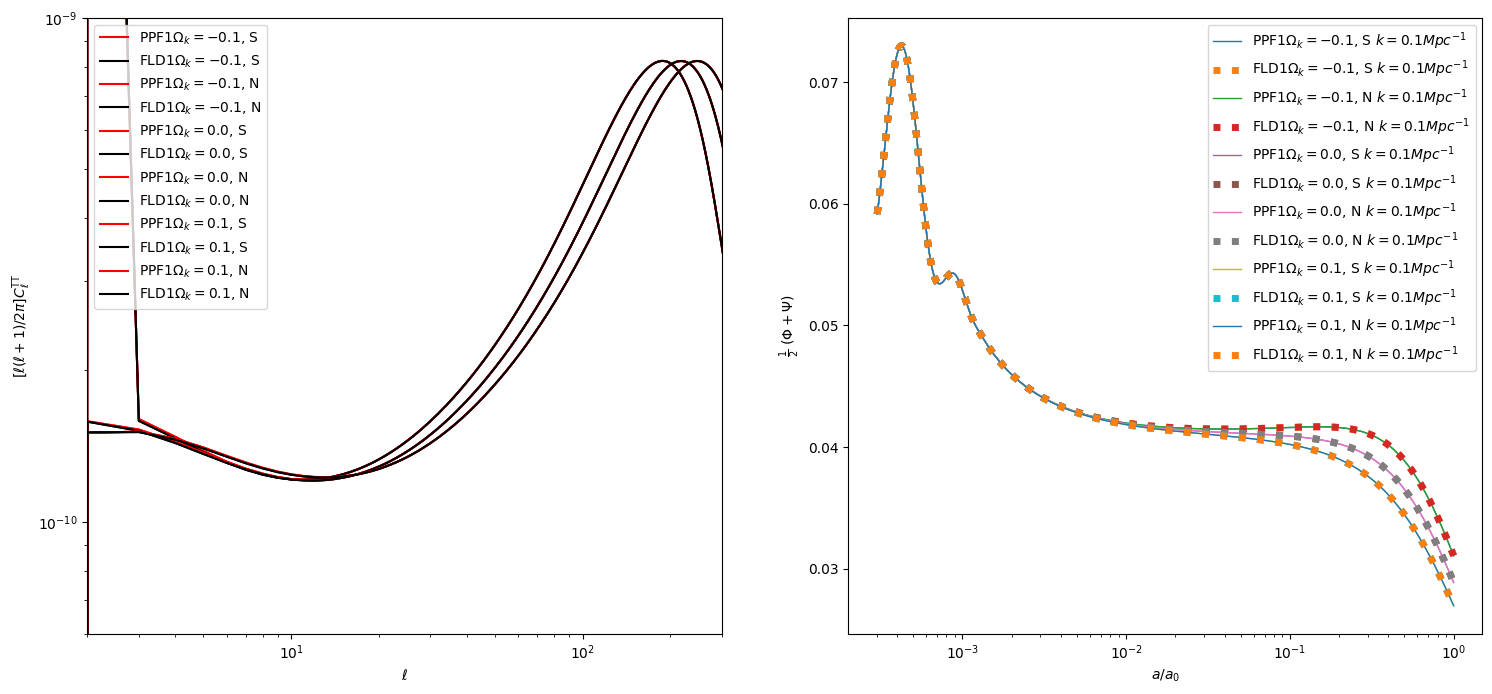

In [6]:
# For a final plot, do the same as above, but with a diffrent k_output_value
colors = ['r','k','g','m']

k_out = [1e-1] #[1e-4, 1e-3, 1e-2]

fig, axes = plt.subplots(1,2,figsize=(18,8))
# For each combinations of Omega_k curvature and the gauge choice
for Omega_K in [-0.1, 0.0, 0.1]:
    for gauge in ['Synchronous','Newtonian']:
        cosmo = {}
        for M in models:
            # Decide if you need to use PPF or not
            use_ppf = 'yes'
            if 'FLD' in M:
                use_ppf = 'no'

            # Generate the CLASS object
            cosmo[M] = Class()

            cosmo[M].set({'output':'tCl mPk dTk vTk','k_output_values':str(k_out).strip('[]'),
                  'h':h[M],
                  'omega_b':omega_b,'omega_cdm':omega_cdm[M],'Omega_k':Omega_K,
                  ##'Omega_b':Omega_b,'omega_cdm':Omega_cdm[M],
                  'cs2_fld':1.,
                  'w0_fld':w0[M],'wa_fld':wa[M],'Omega_Lambda':0.,'gauge':gauge,
                  'use_ppf':use_ppf,'hyper_sampling_curved_low_nu':6.1})
            
        #fig, axes = plt.subplots(1,2,figsize=(16,5))
        # For each of the models, get the unlensed Cls, plot them and also plot the lensing potential
        for j,M in enumerate(models):
            cl = cosmo[M].raw_cl()
            l = cl['ell']

            # Plot the CL^TT * (l*(l+1))/(2*pi)
            label = M+r'$\Omega_k='+str(Omega_K)+'$, '+gauge[0]
            axes[0].loglog(l,cl['tt']*l*(l+1)/(2.*np.pi),label=label,color=colors[j])

            # Now get the perturbations (at the previously defined k_output_values)
            pt = cosmo[M].get_perturbations()
            pts = pt['scalar']
            for i,k in enumerate(k_out):
                ptk = pts[i]
                # Plot FLD and PPF differently
                if 'FLD' in M:
                    ls = ':'
                    lw=5
                else:
                    ls = '-'
                    lw=1
                # Now plot the given perturbation (in this case the absolute value of the lensing potential)
                axes[1].semilogx(ptk['a'],0.5*abs(ptk['phi']+ptk['psi']),label=label+' '+'$k='+str(k)+'Mpc^{-1}$',ls=ls,lw=lw)

axes[0].legend(loc='upper left')
axes[0].set_xlim([2,300])
axes[0].set_ylim([6e-11,1e-9])
axes[0].set_xlabel(r'$\ell$')
axes[0].set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')

axes[1].legend(loc='upper right')
#axes[1].set_xlim([1e-2,1])
#axes[1].set_ylim([0.3,0.63])
axes[1].set_xlabel(r'$a/a_0$')
axes[1].set_ylabel(r'$\frac{1}{2}~(\Phi+\Psi)$')

fig.savefig('check_PPF_Omegak2.pdf')               